In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("data/miniterrain.csv")

In [3]:
df.head()

,bumpiness,grade,target
0,0.832143,0.980161,1.0
1,0.530852,0.934583,1.0
2,0.069974,0.502007,0.0
3,0.414885,0.056444,0.0
4,0.633748,0.897043,1.0


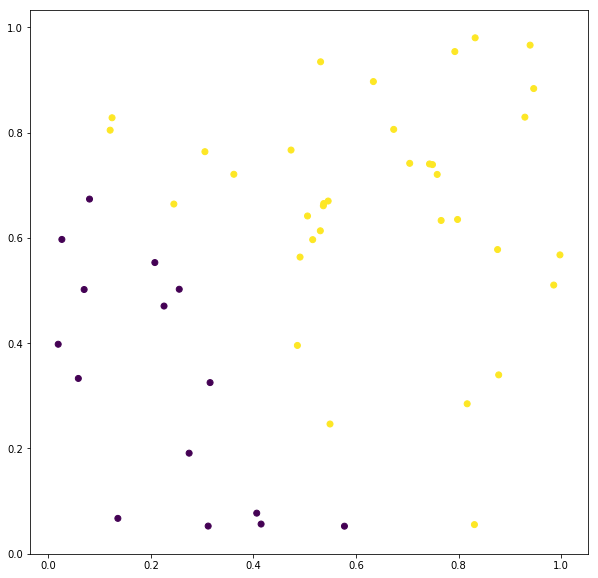

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [5]:
# We need to find a line that separates one class and the other. For example. this one:

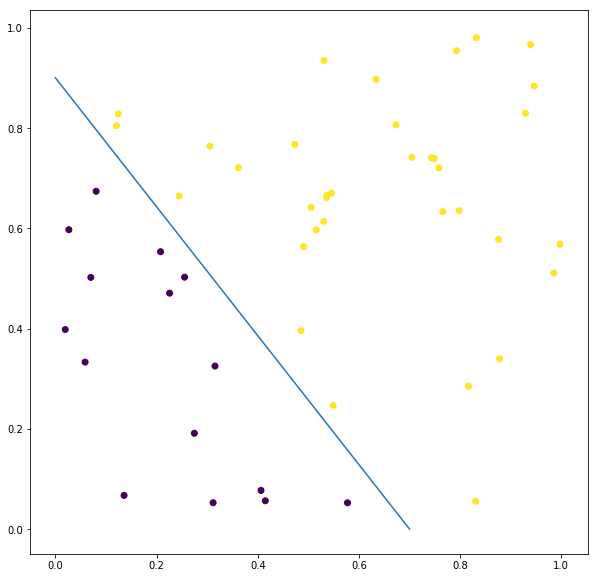

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.show()

In [7]:
# But there are infinite lines that could cut the dataset in 2

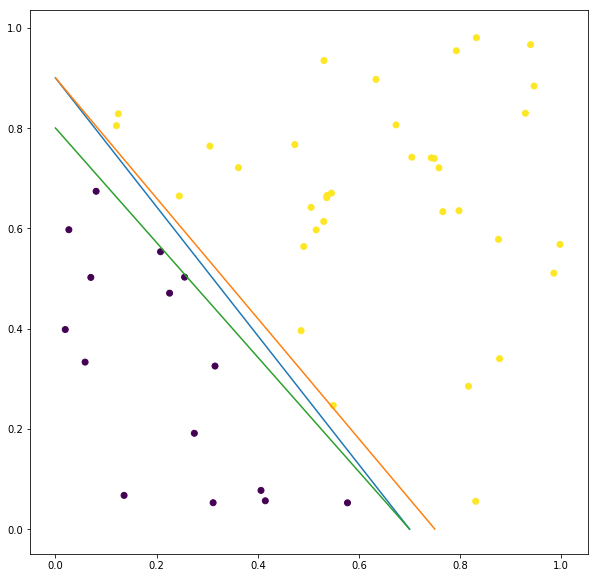

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.plot([0,0.75],[0.9,0])
plt.plot([0,0.7],[0.8,0])
plt.show()

In [9]:
# We need to find the one which maximizes the margin to the separating line. Let's take the original line 
# and let's draw the margins for each point

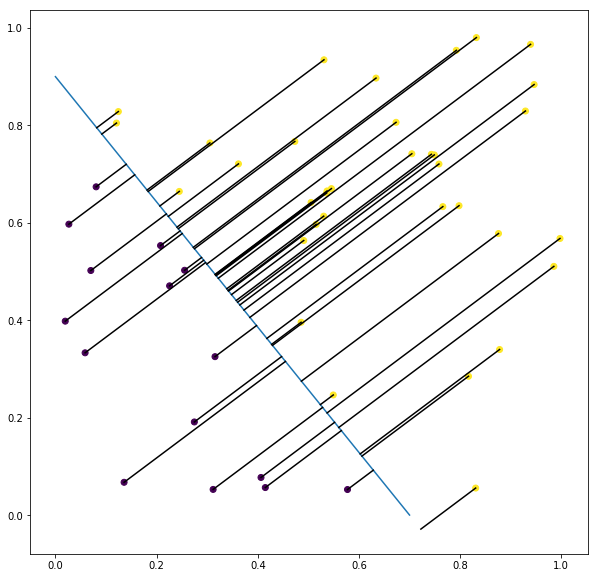

In [10]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])


for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [11]:
# But in reality, we see that only the points that are next to the separating line are the ones used to find 
# the line and the maximum margin

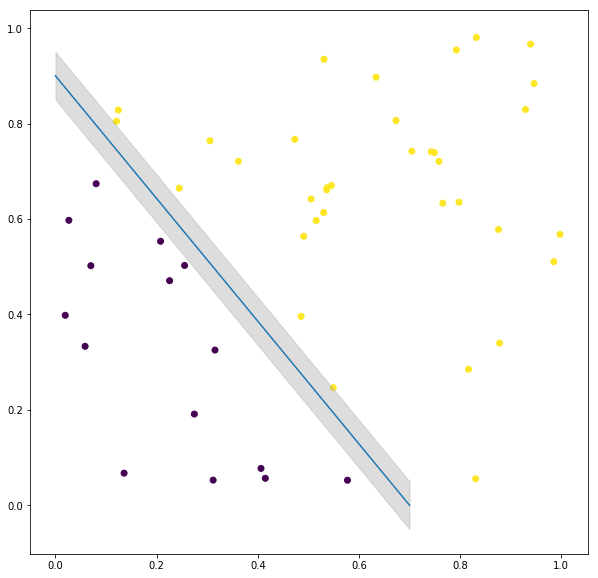

In [12]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])
plt.fill_between([0,0.7],[0.95,0.05],[0.85,-0.05], edgecolor='none', color='#AAAAAA', alpha=0.4)
plt.show()

In [13]:
# Those points that are nearest to the line are called the SUPPORT VECTORS. 

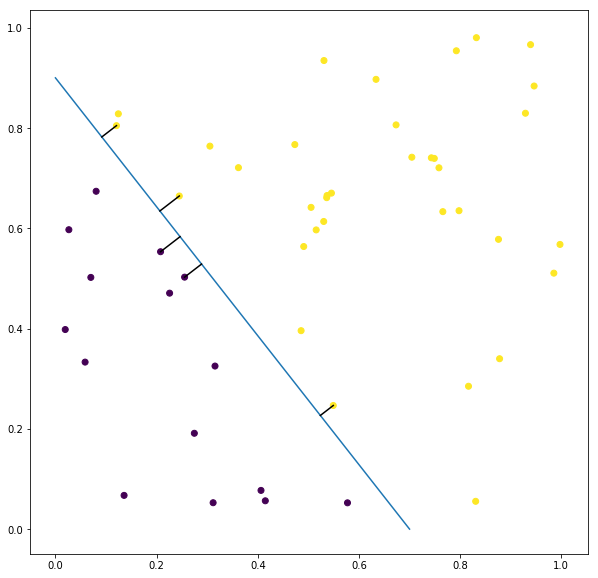

In [14]:
import math

x1=0.0
y1=0.9
x2=0.7
y2=0.0

plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.plot([0,0.7],[0.9,0])

d=[]

for x3,y3 in df[["bumpiness","grade"]].values:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    
    d.append([(x3-x4)**2+(y3-y4)**2,x3,y3])
    

d = sorted(d,key=lambda e: e[0])
d = list(map(lambda e: [e[1],e[2]],d))
d = d[:5]

for x3,y3 in d:
    # first convert line to normalized unit vector
    dx = x2 - x1
    dy = y2 - y1
    mag = math.sqrt(dx*dx + dy*dy)
    dx /= mag
    dy /= mag

    #translate the point and get the dot product
    l = (dx * (x3 - x1)) + (dy * (y3 - y1))
    x4 = (dx * l) + x1
    y4 = (dy * l) + y1
    

    plt.plot([x4,x3],[y4,y3],color="black" )
    
plt.show()

In [15]:
from sklearn.svm import SVC

In [16]:
clf=SVC(kernel="linear")

In [17]:
X = df[["bumpiness","grade"]].values
y = df["target"]

In [18]:
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

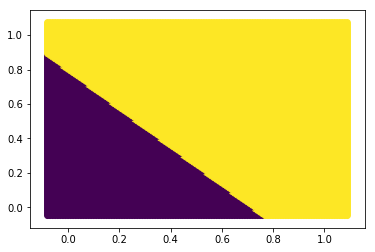

In [19]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx,yy,c=Z)

In [20]:
# Let's put the data in a compliant form and use the sklearn method and load the support vector

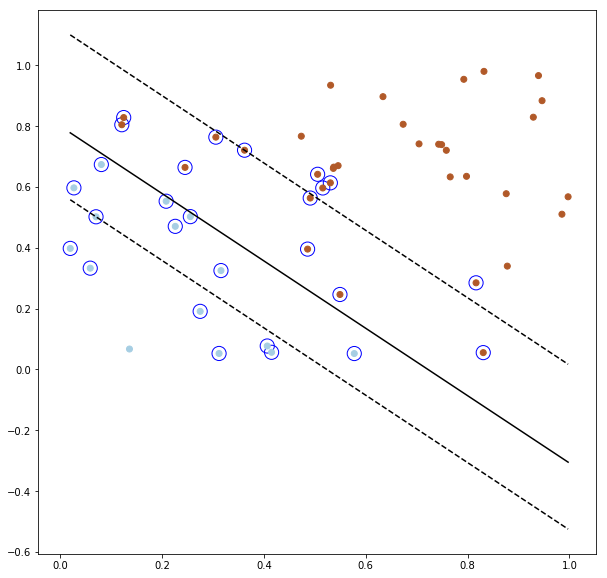

In [21]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [22]:
# We have highlighted the support vectors, the hyperplane.

In [23]:
# Now we can segment the space to find the output of the classifier

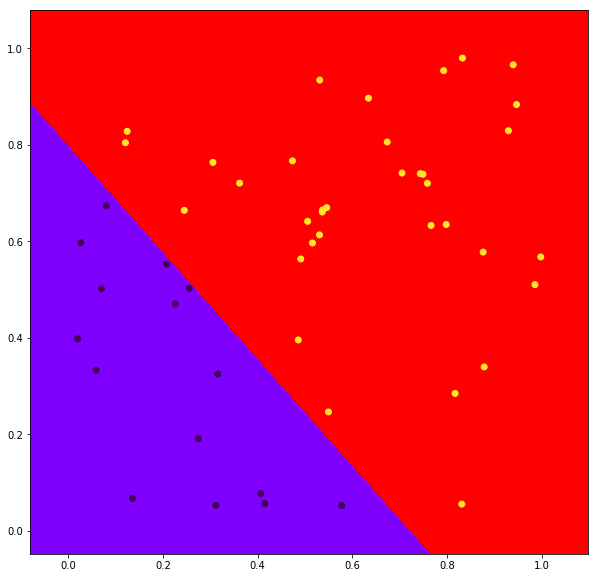

In [24]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [25]:
# Now this was just with a subset. Let's put all the points.

In [26]:
df = pd.read_csv("data/terrain.csv")

In [27]:

X = df[["bumpiness","grade"]].values
y = df["target"]

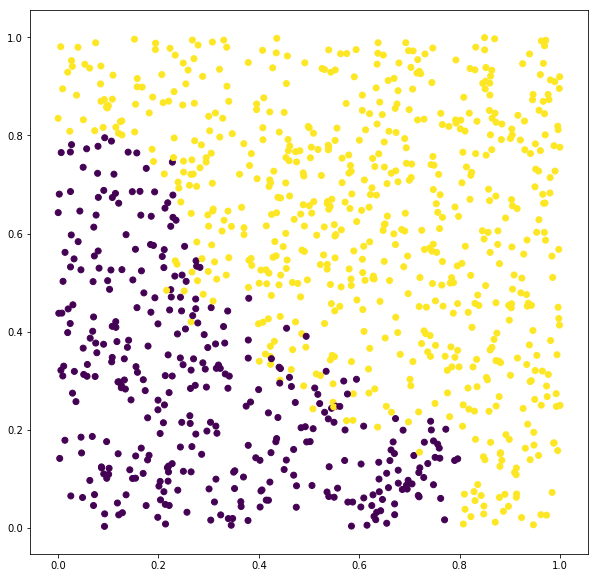

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(df["bumpiness"],df["grade"],c=df["target"])
plt.show()

In [29]:
clf=SVC(kernel="linear",C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

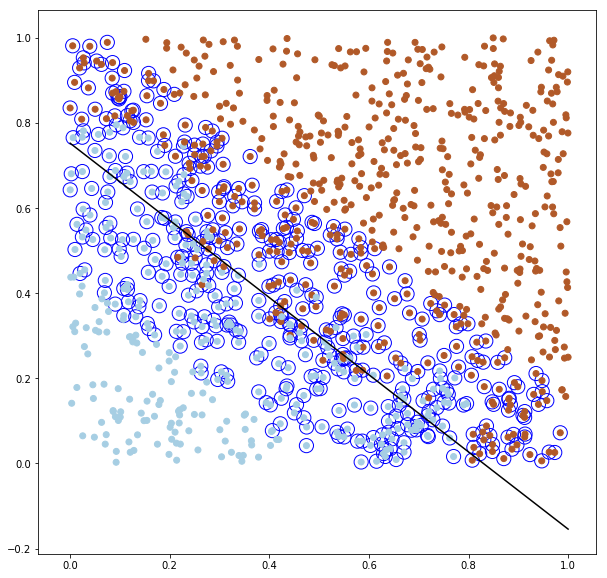

In [30]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plt.plot(clf.)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [31]:
# We see that the margin is now soft and more support vectors are now used.

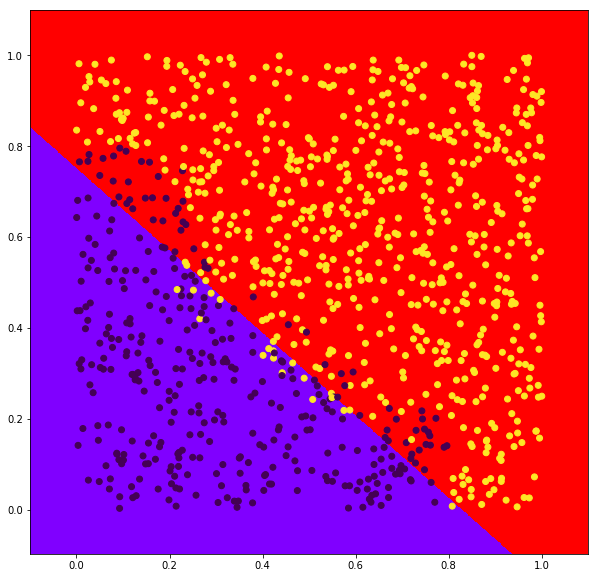

In [32]:
h = .001
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.pcolormesh(xx, yy, Z,cmap="rainbow")
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

In [33]:
from sklearn.svm import SVC

In [34]:
# Accuracy
X = df[["bumpiness","grade"]].values
y = df["target"]
clf=SVC(kernel="linear",C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(clf,X,y,cv=10).mean()

0.9149844984498449

In [37]:
# Let's take a pause and look to a more complicated theoretical case:

In [65]:
df = pd.read_csv("data/points.csv")

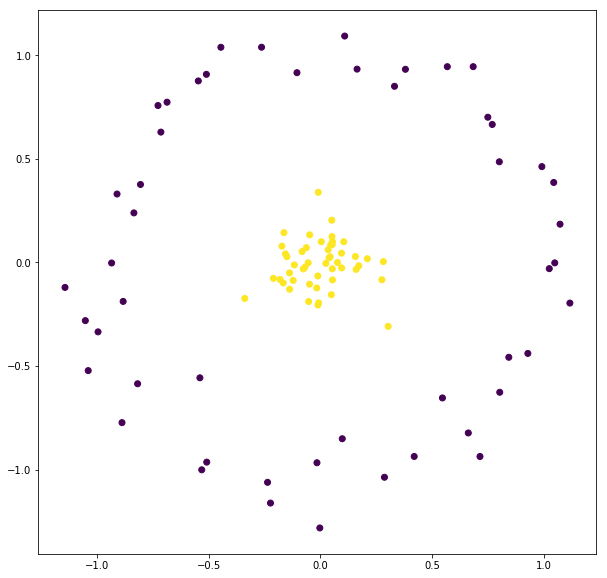

In [66]:
plt.figure(figsize=(10,10))
plt.scatter(df["X"],df["Y"],c=df["target"])
plt.show()

In [67]:
X = df[["X","Y"]].values
y = df["target"]
clf=SVC(kernel="linear",C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

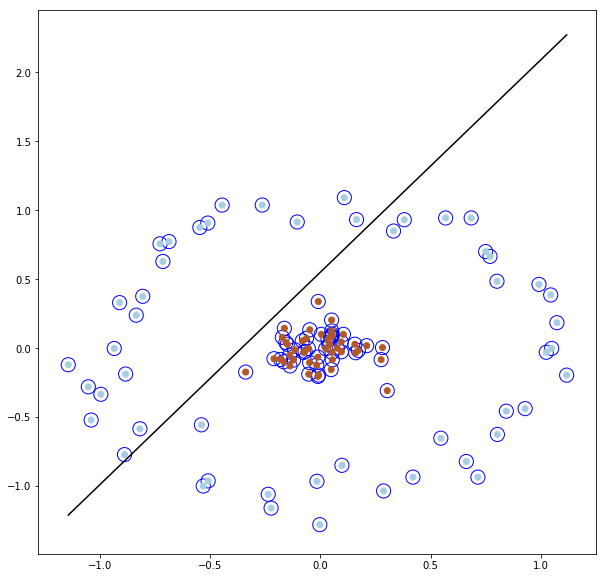

In [68]:
# From here: http://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
import numpy as np
plt.figure(figsize=(10,10))
    

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color="none",edgecolor="blue",s=200)

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]))
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')


plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.show()

In [69]:
# There's no line separating both spaces. So we can use a trick to still use a plane to separate. 
# Let's add a feature

In [70]:
df["Z"]=df["X"]**2+df["Y"]**2

In [71]:
X = df[["X","Y","Z"]].values
y = df["target"]
clf=SVC(kernel="linear",C=0.1)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [72]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
py.iplot([go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2],mode="markers",marker={"color":y})])

In [73]:
"""from mpl_toolkits import mplot3d
plt.figure(figsize=(10,10))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=y)
ax.view_init(elev=30, azim=180)
plt.show()"""

"from mpl_toolkits import mplot3d\nplt.figure(figsize=(10,10))\nax = plt.subplot(projection='3d')\nax.scatter3D(X[:, 0], X[:, 1], X[:, 2],c=y)\nax.view_init(elev=30, azim=180)\nplt.show()"

In [74]:
X = df[["X","Y"]].values
y = df["target"]
clf=SVC(kernel="rbf",C=0.1,gamma=10)
clf.fit(X,y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
from ipywidgets import interact

In [76]:
h = .01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

@interact(gamma=10)
def show(gamma):
    clf=SVC(kernel="rbf",C=0.1,gamma=gamma*10)
    clf.fit(X,y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z,cmap="rainbow")
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

interactive(children=(IntSlider(value=10, description='gamma', max=30, min=-10), Output()), _dom_classes=('wid…

In [50]:
df = pd.read_csv("data/terrain.csv")
X = df[["bumpiness","grade"]].values
y = df["target"]

In [51]:
clf1=SVC(kernel="poly",degree=3,C=1)

In [52]:
cross_val_score(clf1,X,y,cv=10).mean()

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will chang

0.921074807480748

In [53]:
clf1=SVC(kernel="rbf",gamma=3,C=1)

In [54]:
cross_val_score(clf1,X,y,cv=10).mean()

0.9350053005300529

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
clf1=GridSearchCV(estimator=SVC(kernel="rbf",gamma=3,C=1),
                  param_grid={"gamma":[10,100,1000]})
clf1.fit(X,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [57]:
clf1.best_params_

{'gamma': 10}

In [58]:
clf1=GridSearchCV(estimator=SVC(kernel="poly",degree=3,C=1),
                  param_grid={"degree":np.arange(2,30)},
                 scoring="precision")
clf1.fit(X,y)

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in versi

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will chang

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.

/Users/sebastien.perez/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will chang

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'degree': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='precision', verbose=0)

In [59]:
clf1.best_params_

{'degree': 4}

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

In [62]:
confusion_matrix(y_test,clf1.predict(X_test))

array([[115,   3],
       [ 36, 176]])

In [63]:
print(classification_report(y_test,clf1.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.86       118
         1.0       0.98      0.83      0.90       212

   micro avg       0.88      0.88      0.88       330
   macro avg       0.87      0.90      0.88       330
weighted avg       0.90      0.88      0.88       330



![alt text](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg "Logo Title Text 1")

